# 1. Install Dependencies and Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = '/content/drive/MyDrive/project/Data Mining ||/data'

removing all the images which has different extension other than present in image_exts list

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): # every directory
    for image in os.listdir(os.path.join(data_dir, image_class)): #every image in sub directory
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) # image extension
            if tip not in image_exts:     # extension does not exist in image_exist list remove it
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)  # loading images from directory and creating dataset for evaluation

Found 1314 files belonging to 2 classes.


In [ ]:
# Fetching more than one batch from dataset
data_iterator = data.as_numpy_iterator()

In [ ]:
# Fetch Batch One by One from data pipeline (data_iterator)
batch = data_iterator.next()

Plotting Images Class 1 = Sad , Class 0 = Happy

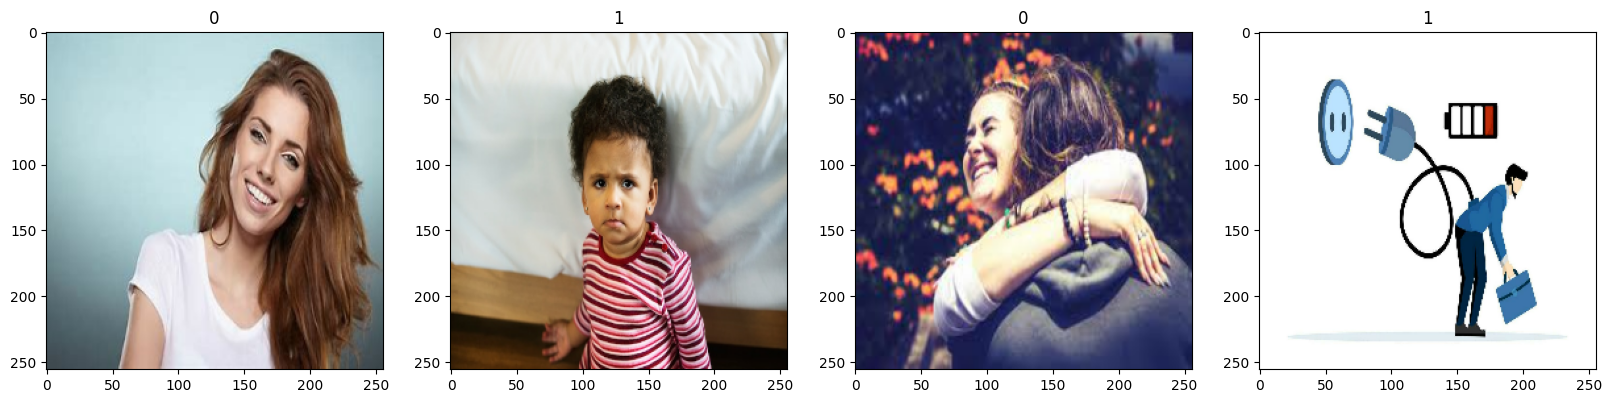

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # figure with grid 4
for idx, img in enumerate(batch[0][:4]):  # iterating to fetch first four images
    ax[idx].imshow(img.astype(int))   # converting image in interger and dislaying it
    ax[idx].title.set_text(batch[1][idx]) # displaying the class of image as title

# 4. Scale Data

Pixel Values Ranges 0-255 normalizing it to 0-1

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.05098039, 0.05490196, 0.07058824],
          [0.06041666, 0.06433824, 0.08002451],
          [0.10330883, 0.1072304 , 0.12291667],
          ...,
          [0.0765625 , 0.09224878, 0.10401348],
          [0.07809436, 0.09378064, 0.10554534],
          [0.07843138, 0.09411765, 0.10588235]],
 
         [[0.05401348, 0.05793505, 0.07362133],
          [0.0631891 , 0.06711067, 0.08279694],
          [0.10489646, 0.10881802, 0.1245043 ],
          ...,
          [0.07770254, 0.09338882, 0.10515352],
          [0.07857618, 0.09426246, 0.10602716],
          [0.07876838, 0.09445465, 0.10621937]],
 
         [[0.06780025, 0.07172181, 0.08740809],
          [0.07579106, 0.07971263, 0.09539891],
          [0.11211296, 0.11603454, 0.13172081],
          ...,
          [0.08288454, 0.09857082, 0.11033553],
          [0.08076627, 0.09645254, 0.10821725],
          [0.08030024, 0.09598652, 0.10775123]],
 
         ...,
 
         [[0.03547794, 0.05508579, 0.03939951],
          [0.03682

# 5. Split Data

In [ ]:
len(data)

42

Train - 70 % Validation 20 % Test 10 %

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

29

In [ ]:
# Take - take first n elements .
# Skip - skip first n elements .
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

Filters in Conv2D - Small Metrices that extracts feature

In [ ]:
# layer 1 - Conv2D extract meaningfull info from images by one by pixel using 16 filters
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# layer 2 - Conv2D extract more meaningfull info from images by one by pixel using 32 filters
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# layer 3 - Conv2D extract meaningfull info from images by one by pixel using 16 filters
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# converting the 2D feature map to 1D array
model.add(Flatten())

# connecting each input present in one layers to another layer
model.add(Dense(256, activation='relu'))

# as we have happy and sad class : 1 output from each layers that will range in 0-1
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# adam - optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [ ]:
logdir='/content/drive/MyDrive/project/Data Mining ||/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Fit - trains the data . Epcohs - No of Iterations over training dataset . Callback - checkpoints for monitoring.
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.5252 - loss: 0.8651 - val_accuracy: 0.6211 - val_loss: 0.6305
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.6388 - loss: 0.6603 - val_accuracy: 0.6641 - val_loss: 0.6188
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6869 - loss: 0.5819 - val_accuracy: 0.7344 - val_loss: 0.5478
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.7078 - loss: 0.5537 - val_accuracy: 0.7227 - val_loss: 0.5685
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7564 - loss: 0.5013 - val_accuracy: 0.6992 - val_loss: 0.5385
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7989 - loss: 0.4368 - val_accuracy: 0.7773 - val_loss: 0.4469
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.8168 - loss: 0.3762 - val_accuracy: 0.7812 - val_loss: 0.4616
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.8836 - loss: 0.3069 - val_accuracy: 0.7734 - val_lo

# 8. Plot Performance

The Plot shows overfitting - working well on trained data but bad on unseen data

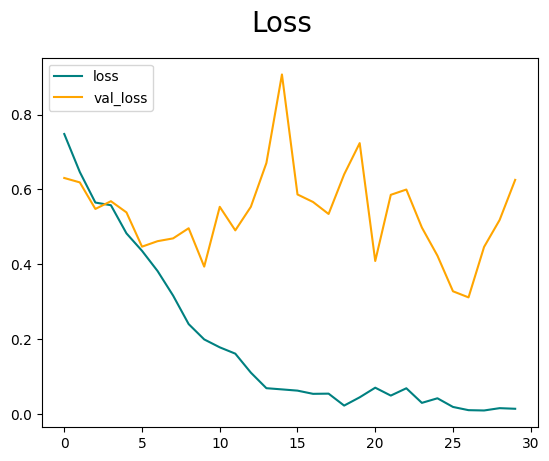

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

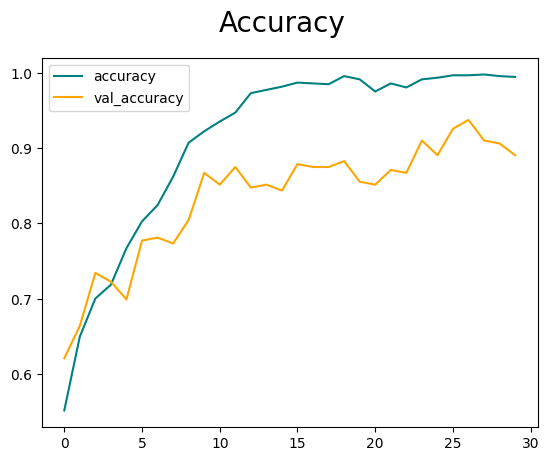

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)e
    acc.update_state(y, yhat)

SyntaxError: invalid syntax (<ipython-input-35-3cb9046ee927>, line 5)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
img = cv2.imread('/content/drive/MyDrive/project/Data Mining ||/R.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

0.5 - binary classification (Happy or Sad)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')
yhat[0]

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))